In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv('modified_dataset_with_purchase_locations.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CHURN,PURCHASE_LOCATION
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0,Restaurants
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0,Online Shopping
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0,Grocery Store
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,1,Grocery Store
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0,Electronics Store


In [3]:
# Step 3: Prepare the data for churn prediction (Assume 'CHURN' is the target column)
X = df.drop(columns=['CHURN', 'CUST_ID','CREDIT_LIMIT','MINIMUM_PAYMENTS','PAYMENTS', 'PURCHASE_LOCATION'],axis=1)  # Drop target and non-relevant columns
y = df['CHURN']  # Target variable: 1 = Churn, 0 = Not Churn
X.shape

(8950, 14)

In [4]:
# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [5]:
# Step 5: Train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [6]:
# Step 6: Predict churn on the test set
y_pred = rf_classifier.predict(X_test)

In [7]:
# Step 7: Evaluate the churn prediction model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [8]:
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))


Accuracy: 96.28%
Precision: 61.94%
Recall: 62.88%
F1 Score: 62.41%


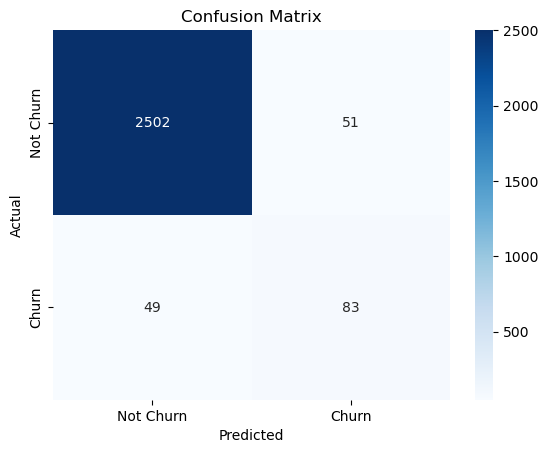

In [9]:
# Confusion matrix for visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [10]:
# Step 8: Define the reward suggestion function based on churn prediction and purchase location
def suggest_rewards(row):
    reward = None
    if row['CHURN'] == 1:  # Customer is predicted to churn
        if row['PURCHASE_LOCATION'] == 'Gas Station':
            reward = 'Free gas on next purchase'
        elif row['PURCHASE_LOCATION'] == 'Online Shopping':
            reward = 'Discount on next online purchase'
        elif row['PURCHASE_LOCATION'] == 'Grocery Store':
            reward = 'Discount on next grocery purchase'
        elif row['PURCHASE_LOCATION'] == 'Restaurants':
            reward = 'Free meal or discount at restaurant'
        elif row['PURCHASE_LOCATION'] == 'Electronics Store':
            reward = 'Discount on next electronics purchase'
        elif row['PURCHASE_LOCATION'] == 'Pharmacy':
            reward = 'Free or discounted pharmacy items'
        else:
            reward = 'Special discount'
    else:  # Customer is not predicted to churn
        reward = 'Cashback on next purchase'
    
    # Print the customer ID and the reward for debugging purposes
    print(f"Customer ID: {row['CUST_ID']}, Reward: {reward}")
    
    return reward

In [11]:
# Step 9: Combine churn prediction with reward suggestion
# Note: We still need PURCHASE_LOCATION for the reward system, so it's not dropped from df
df['CHURN_PREDICTED'] = rf_classifier.predict(df.drop(columns=['CHURN', 'CUST_ID','CREDIT_LIMIT','MINIMUM_PAYMENTS','PAYMENTS', 'PURCHASE_LOCATION']))


In [12]:
X.shape

(8950, 14)

In [13]:
# Apply the reward suggestion function (PURCHASE_LOCATION is still needed for rewards)
df['REWARD_SUGGESTION'] = df.apply(suggest_rewards, axis=1)

Customer ID: C10001, Reward: Cashback on next purchase
Customer ID: C10002, Reward: Cashback on next purchase
Customer ID: C10003, Reward: Cashback on next purchase
Customer ID: C10004, Reward: Discount on next grocery purchase
Customer ID: C10005, Reward: Cashback on next purchase
Customer ID: C10006, Reward: Cashback on next purchase
Customer ID: C10007, Reward: Cashback on next purchase
Customer ID: C10008, Reward: Cashback on next purchase
Customer ID: C10009, Reward: Cashback on next purchase
Customer ID: C10010, Reward: Cashback on next purchase
Customer ID: C10011, Reward: Cashback on next purchase
Customer ID: C10012, Reward: Cashback on next purchase
Customer ID: C10013, Reward: Cashback on next purchase
Customer ID: C10014, Reward: Cashback on next purchase
Customer ID: C10015, Reward: Cashback on next purchase
Customer ID: C10016, Reward: Cashback on next purchase
Customer ID: C10017, Reward: Cashback on next purchase
Customer ID: C10018, Reward: Cashback on next purchase
Cu